<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
#Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.
## Write your code here
# Identify missing values in critical columns
missing_employment = df['Employment'].isnull().sum()
missing_jobsat = df['JobSat'].isnull().sum()
missing_remotework = df['RemoteWork'].isnull().sum()

print(f"Missing Employment: {missing_employment}")
print(f"Missing JobSat: {missing_jobsat}")
print(f"Missing RemoteWork: {missing_remotework}")

# Strategy: Drop rows if Employment is missing (critical for analysis)
df = df.dropna(subset=['Employment'])

# For JobSat and RemoteWork, fill missing values with 'Unknown'
df['JobSat'] = df['JobSat'].fillna('Unknown')
df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

# Check remaining missing values
print("Remaining missing values after handling:")
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

Missing Employment: 0
Missing JobSat: 36311
Missing RemoteWork: 10631
Remaining missing values after handling:
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


C:\Users\Big Honk\AppData\Local\Temp\ipykernel_30744\4065841036.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')


Median JobSat for each experience range:
ExperienceRange
0-5      Unknown
5-10     Unknown
10-20    Unknown
>20      Unknown
Name: JobSat, dtype: object


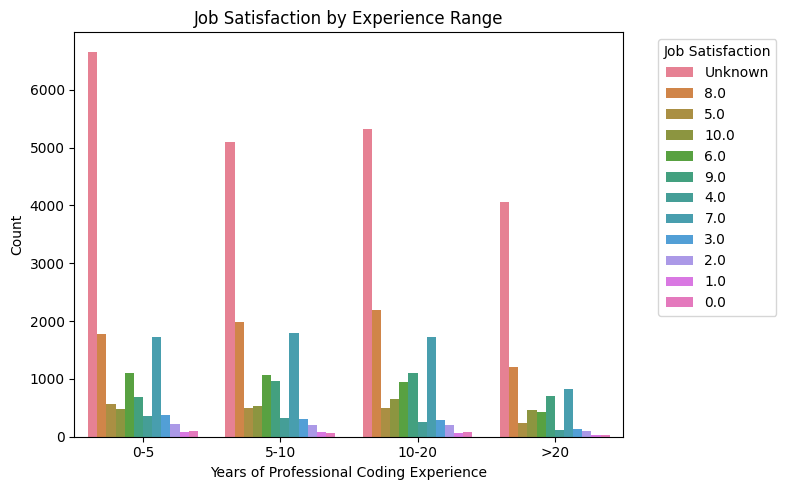

In [4]:
## Write your code here
# Convert YearsCodePro to numeric, handling non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat for each range (assuming JobSat is ordinal or can be mapped to numeric)
# If JobSat is categorical, show value counts instead
median_jobsat = df.groupby('ExperienceRange')['JobSat'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

print("Median JobSat for each experience range:")
print(median_jobsat)

# Visualize the relationship using a bar plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ExperienceRange', hue='JobSat')
plt.title('Job Satisfaction by Experience Range')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Count')
plt.legend(title='Job Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Unknown'),
  Text(1, 0, '8.0'),
  Text(2, 0, '7.0'),
  Text(3, 0, '6.0'),
  Text(4, 0, '9.0'),
  Text(5, 0, '10.0'),
  Text(6, 0, '5.0'),
  Text(7, 0, '3.0'),
  Text(8, 0, '4.0'),
  Text(9, 0, '2.0'),
  Text(10, 0, '0.0'),
  Text(11, 0, '1.0')])

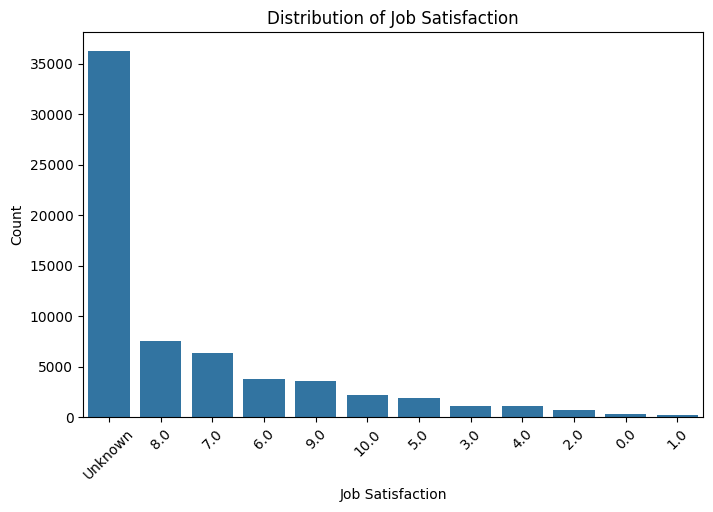

In [5]:
## Write your code here
# Visualize the distribution of JobSat values
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', order=df['JobSat'].value_counts().index)
plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.xticks(rotation=45)

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


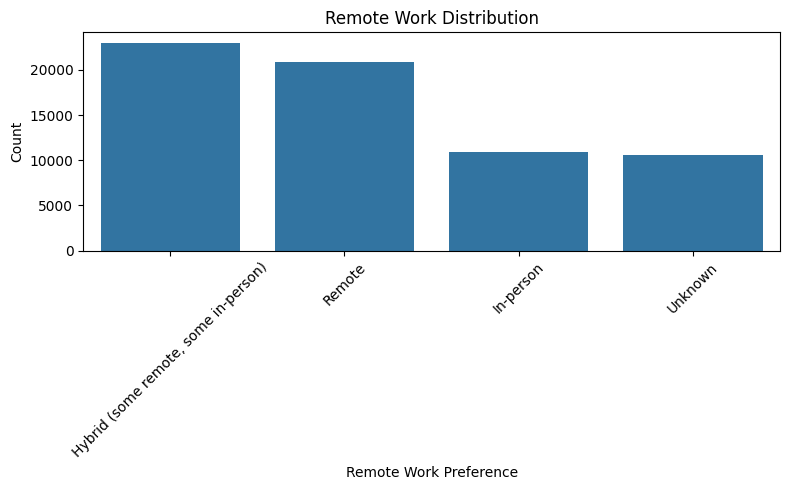

Remote work preferences by employment type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17281   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          0   
Student, part-time                  

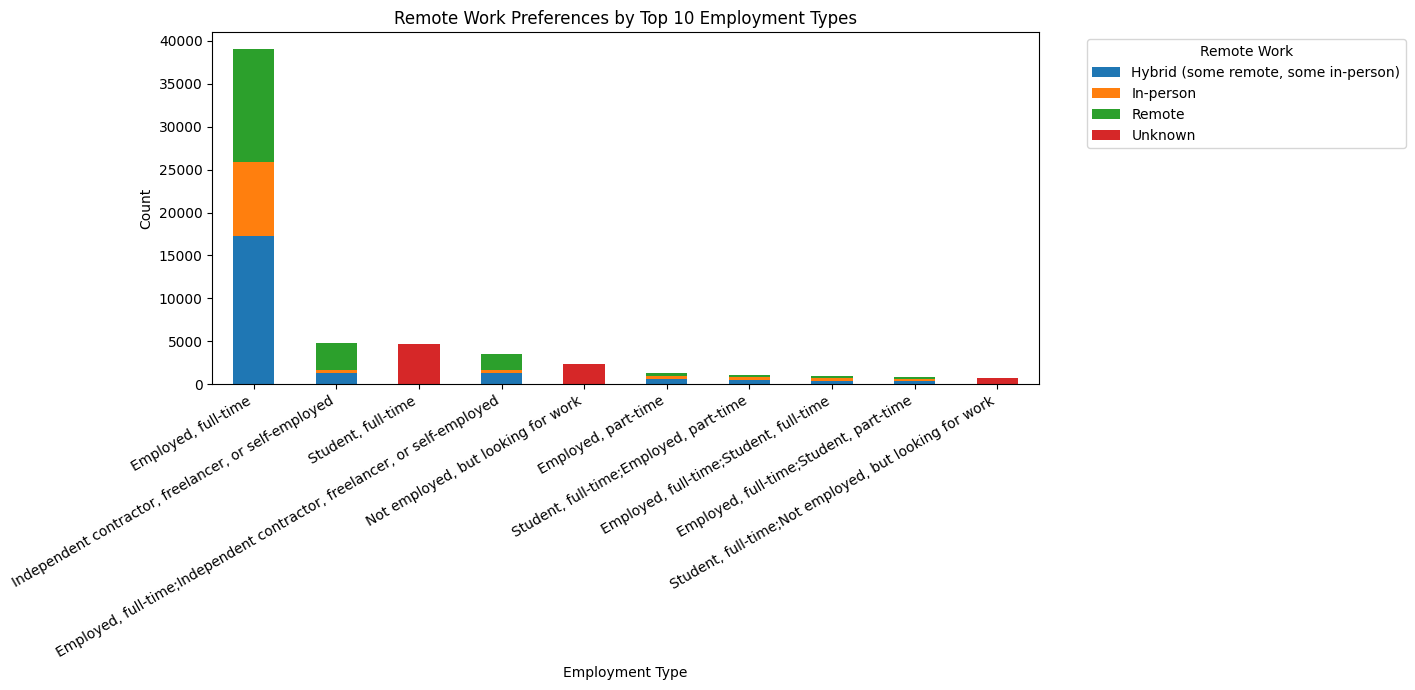

In [8]:
# Count plot for remote work distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', order=df['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Cross-tabulate remote work preferences by employment type and job roles
remotework_employment_ct = pd.crosstab(df['Employment'], df['RemoteWork'])
print("Remote work preferences by employment type:")
print(remotework_employment_ct)

# Only keep the top 10 employment types by total count
top10_employment = df['Employment'].value_counts().head(10).index
remotework_employment_ct_top10 = remotework_employment_ct.loc[top10_employment]

# Visualize the cross-tabulation as a stacked bar plot (top 10 only)
ax = remotework_employment_ct_top10.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Remote Work Preferences by Top 10 Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')  # Rotate labels for readability
plt.legend(title='Remote Work', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


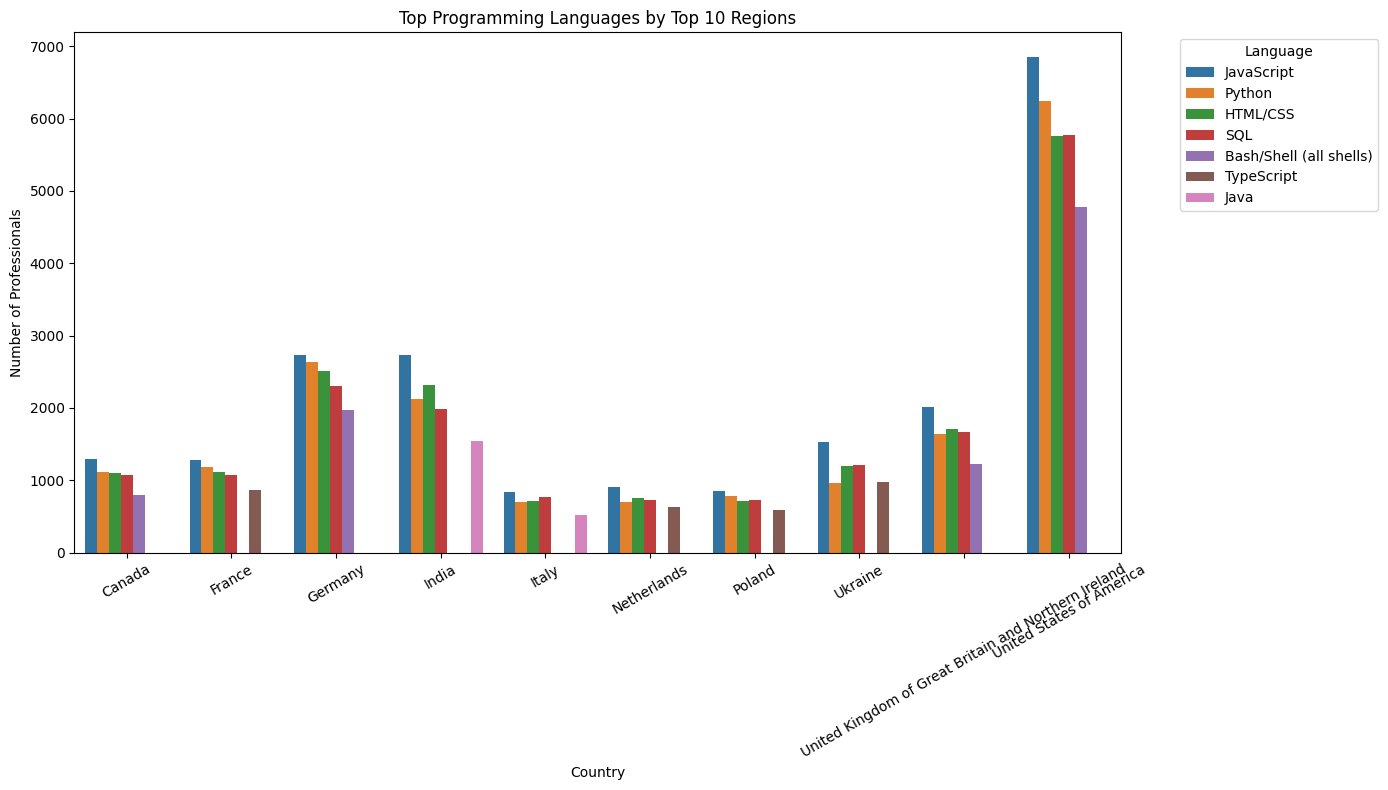

In [14]:
## Write your code here
# Create a copy to avoid SettingWithCopyWarning
df_languages = df.dropna(subset=['LanguageHaveWorkedWith', 'Country']).copy()
df_languages['LanguageList'] = df_languages['LanguageHaveWorkedWith'].str.split(';')

# Explode the list so each language gets its own row
df_exploded = df_languages.explode('LanguageList')

# Find the top 10 regions by number of filled LanguageList entries
top10_regions = df_exploded['Country'].value_counts().head(10).index

# Filter for these regions
filtered = df_exploded[df_exploded['Country'].isin(top10_regions)]

# Group by Country and Language, count occurrences
lang_region_counts = filtered.groupby(['Country', 'LanguageList']).size().reset_index(name='Count')

# Get the top 5 languages per region for visualization
top_langs_per_region = lang_region_counts.sort_values(['Country', 'Count'], ascending=[True, False]).groupby('Country').head(5)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_langs_per_region, x='Country', y='Count', hue='LanguageList')
plt.title('Top Programming Languages by Top 10 Regions')
plt.xlabel('Country')
plt.ylabel('Number of Professionals')
plt.xticks(rotation=30)
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


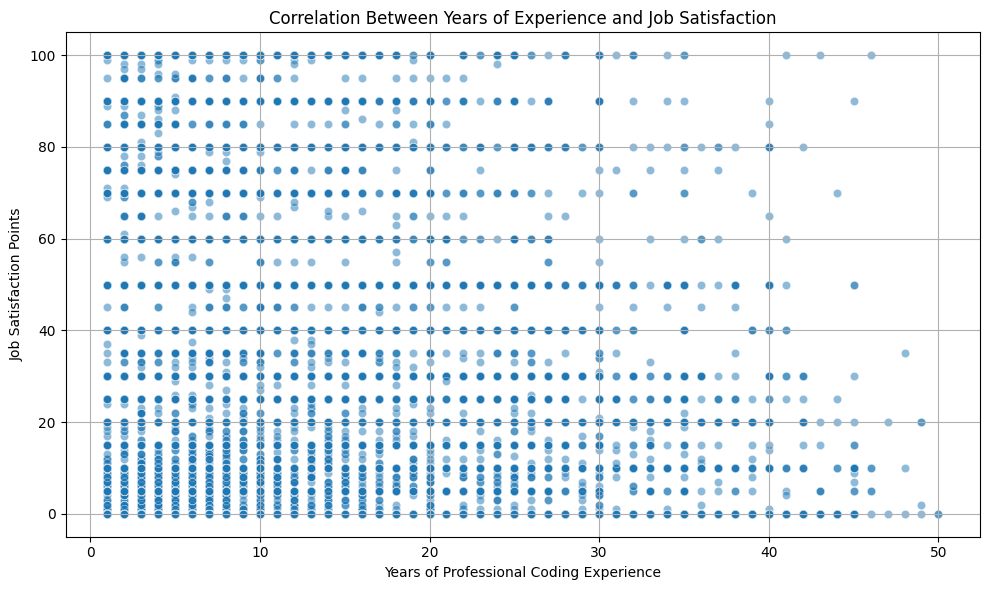

In [15]:
## Write your code here
## Write your code here
# Convert YearsCodePro to numeric, handling non-numeric values
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Convert JobSatPoints_1 to numeric if possible (if not already)
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Drop rows with missing values in either column
scatter_df = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Educational background vs Top 10 Employment types:
Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Independent contractor, freelancer, or self-employed  \
EdLevel                                                               

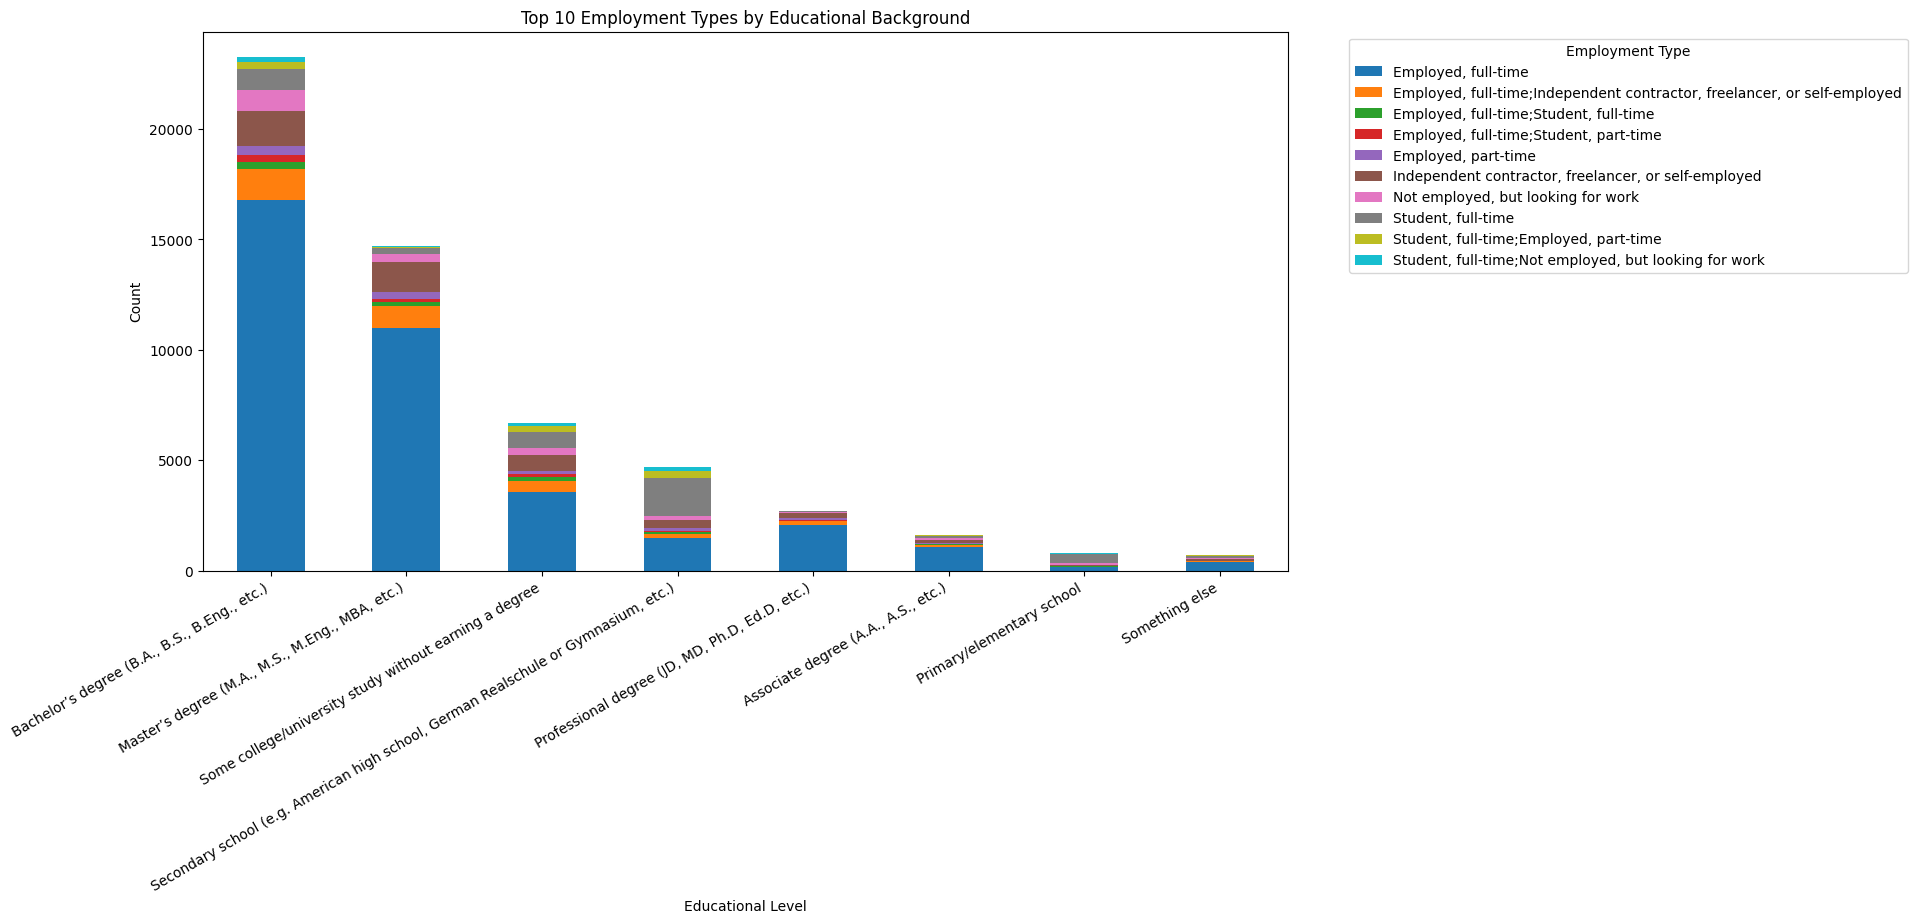

In [17]:
## Write your code here
# Drop rows with missing EdLevel or Employment
df_edu_emp = df.dropna(subset=['EdLevel', 'Employment']).copy()

# Get the top 10 employment types by count
top10_employment_types = df_edu_emp['Employment'].value_counts().head(10).index

# Filter for only the top 10 employment types
df_edu_emp_top10 = df_edu_emp[df_edu_emp['Employment'].isin(top10_employment_types)]

# Cross-tabulate educational background and employment type
edu_emp_ct_top10 = pd.crosstab(df_edu_emp_top10['EdLevel'], df_edu_emp_top10['Employment'])

# Display the cross-tabulation
print("Educational background vs Top 10 Employment types:")
print(edu_emp_ct_top10)

# Visualize as a stacked bar chart (top 8 education levels for readability)
top_ed_levels = df_edu_emp_top10['EdLevel'].value_counts().head(8).index
edu_emp_ct_top8 = edu_emp_ct_top10.loc[top_ed_levels]

ax = edu_emp_ct_top8.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Top 10 Employment Types by Educational Background')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [18]:
## Write your code here
## Write your code here
# Save the cleaned and analyzed dataset to a CSV file
df.to_csv('cleaned_survey_data.csv', index=False)
print("Dataset saved as 'cleaned_survey_data.csv'")

Dataset saved as 'cleaned_survey_data.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
